In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
print('导出成功')

导出成功


In [9]:
#E:/视频qyp/【瑞客论坛 www.ruike1.com】网易云课堂 数据分析师Python进阶（完结）/00-0 QQ群资料/【非常重要】课程资料/CLASSDATA_ch04进阶算法学习：统计分析能力强化/CH01数据特征分析/深圳罗湖二手房信息.csv
#s数据读取

data = pd.read_csv('E:/视频qyp/【瑞客论坛 www.ruike1.com】网易云课堂 数据分析师Python进阶（完结）/00-0 QQ群资料/【非常重要】课程资料/CLASSDATA_ch04进阶算法学习：统计分析能力强化/CH01数据特征分析/深圳罗湖二手房信息.csv',engine='python')
data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


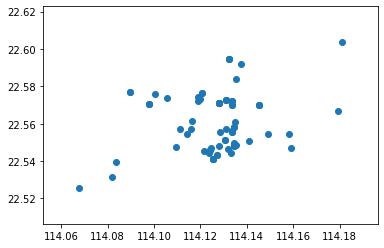

In [10]:
plt.scatter(data['经度'],data['纬度'],
            s= data['房屋价格'],
            c= data['参考总价'],
            alpha= 0.6,
            cmap='Reds')
plt.grid()  #加虚线

In [15]:
#查看极差
def d_range(df,*cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return krange

In [16]:
key1 = '参考首付'
key2 = '参考总价'

dr = d_range(data,key1,key2)

In [17]:
dr

[52.5, 175.0]

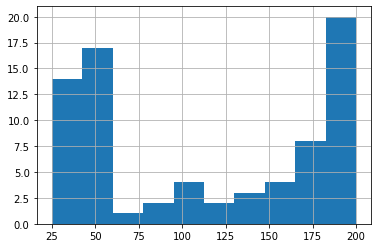

In [22]:
data['参考总价'].hist()

In [24]:
data['参考总价']

0      50.0
1      25.0
2      52.0
3      36.0
4     170.0
      ...  
70     42.0
71     50.0
72     25.0
73    180.0
74    190.0
Name: 参考总价, Length: 75, dtype: float64

In [26]:
#切分
gcut = pd.cut(data['参考总价'],10,right=False)  #将最大值和最小值的差值切成10个区间
print(data['参考总价'].head())

0     50.0
1     25.0
2     52.0
3     36.0
4    170.0
Name: 参考总价, dtype: float64


In [27]:
print(gcut.head())

0      [42.5, 60.0)
1      [25.0, 42.5)
2      [42.5, 60.0)
3      [25.0, 42.5)
4    [165.0, 182.5)
Name: 参考总价, dtype: category
Categories (10, interval[float64]): [[25.0, 42.5) < [42.5, 60.0) < [60.0, 77.5) < [77.5, 95.0) ... [130.0, 147.5) < [147.5, 165.0) < [165.0, 182.5) < [182.5, 200.175)]


In [28]:
gcut_count = gcut.value_counts(sort=False)
gcut_count

[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64

In [30]:
#频率分布情况 -定量字段
# 求出目标字段下频率分布的其他统计量 --> 频数，频率，累计频率
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns={gcut_count.name:'频数'}, inplace=True)
r_zj['频率']= r_zj/r_zj['频数'].sum() #计算频率
r_zj['累计频率'] = r_zj['频率'].cumsum()  #计算累计频率
r_zj['频率%'] = r_zj['频率'].apply(lambda x: "%.2f%%" % (x*100)) #以百分比显示频率
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x:  "%.2f%%" % (x*100))   #以百分比显示累计频率

r_zj.style.bar(subset=['频率','累计频率'], color='green',width = 100)


#可视化显示

,频数,频率,累计频率,频率%,累计频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.013333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.026667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.053333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.026667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.040000,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.053333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1.000000,26.67%,100.00%


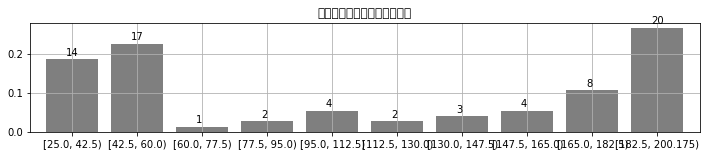

In [33]:
# 频率分布情况 定量字段
# 绘制频率直方图

r_zj['频率'].plot(kind = 'bar',
               width = 0.8,
               figsize = (12,2),
               rot  = 0 ,
               color = 'k',
               grid = True,
               alpha = 0.5)
plt.title('参考总价分布频率绘制直方图')

#绘制直方图

x = len(r_zj)
y = r_zj['频率']
m = r_zj['频数']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i' % k , color = 'k')
#添加频数标签

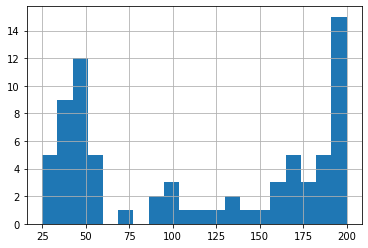

In [34]:
data['参考总价'].hist(bins =20)


In [35]:
import seaborn as sns

s = pd.Series(np.random.randn(100)*100)
s

0     203.480395
1     221.890041
2      81.967580
3      61.325180
4     -60.078897
         ...    
95    114.795030
96     -9.407938
97    -51.361751
98    -96.963620
99     21.131790
Length: 100, dtype: float64

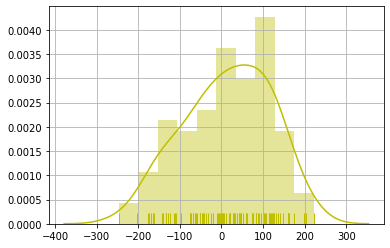

In [37]:
sns.distplot(s,bins=10,hist=True,rug=True,color='y') #
#bins 密度图  hist 直方图  rug 频率分布图
plt.grid()

In [38]:
#多维度直方图
df = pd.DataFrame(np.random.randn(300,2),columns=['A','B'])
df.head()

,A,B
0,-0.655048,-0.681331
1,-0.677875,-0.705540
2,-0.899835,0.332622
3,1.233068,-1.153495
4,-2.109960,1.287652


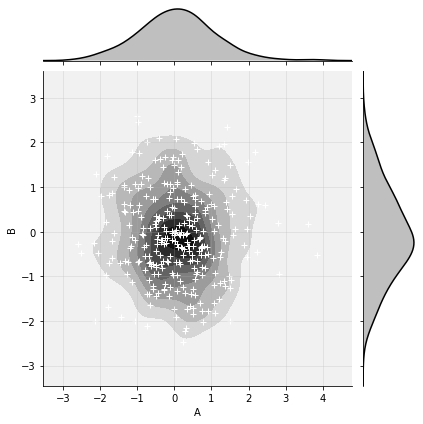

In [41]:
g = sns.jointplot(x=df['A'],y=df['B'],data=df,kind = 'kde' , color='k')
g.plot_joint(plt.scatter,c='w',s=30,linewidth = 1,marker = '+')
plt.grid(alpha=0.3)


#### 2.对比分析

相对数对比 --》 相除